### Hierarichal Clustering

#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")


#### 2. Load Dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 3. Data Preprocessing

In [4]:
print(df.info())
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [5]:
# Change column names
df.columns = ['Customer ID','Gender','Age','Annual Income','Spending Score']

In [6]:
df.head()

,Customer ID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# drop columns
df.drop(columns={"Customer ID","Gender"},axis=0,inplace=True)

#### 4. EDA

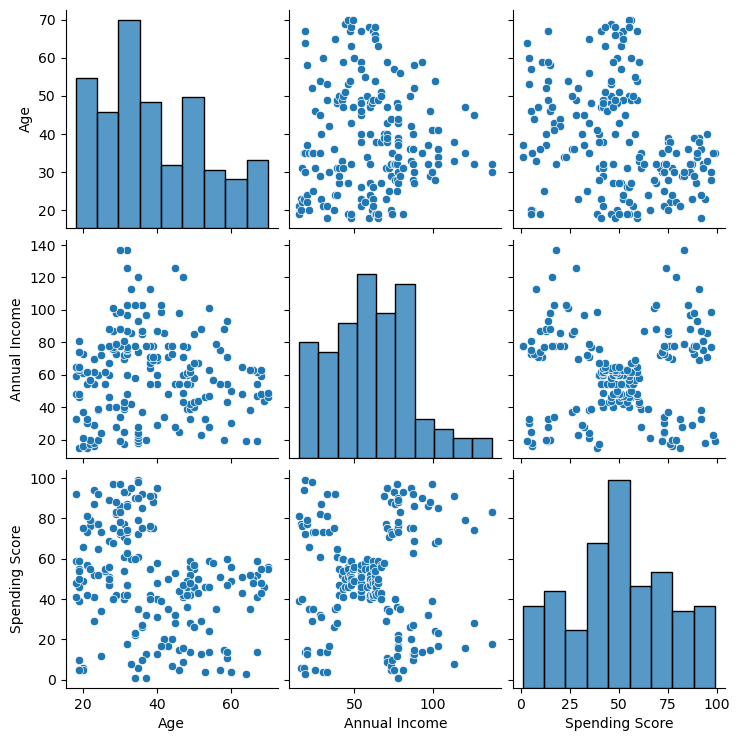

In [9]:
# Display age and annual income with scatter plot
sns.pairplot(df)
plt.show()


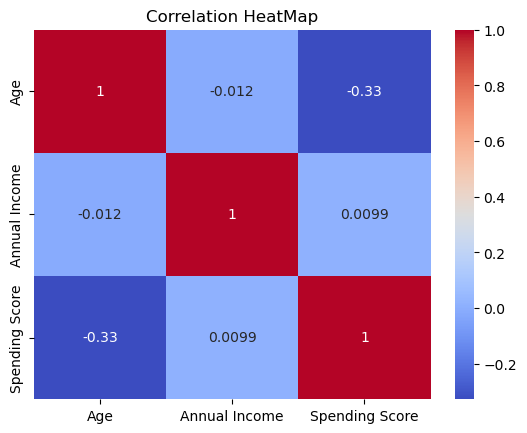

In [10]:
# Display the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation HeatMap")
plt.show()


#### 5. Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data,columns=df.columns)
print(df.head())

        Age  Annual Income  Spending Score
0 -1.424569      -1.738999       -0.434801
1 -1.281035      -1.738999        1.195704
2 -1.352802      -1.700830       -1.715913
3 -1.137502      -1.700830        1.040418
4 -0.563369      -1.662660       -0.395980


In [25]:
df

,Age,Annual Income,Spending Score,clusters
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,3
196,0.441365,2.497807,-0.861839,4
197,-0.491602,2.497807,0.923953,3
198,-0.491602,2.917671,-1.250054,4


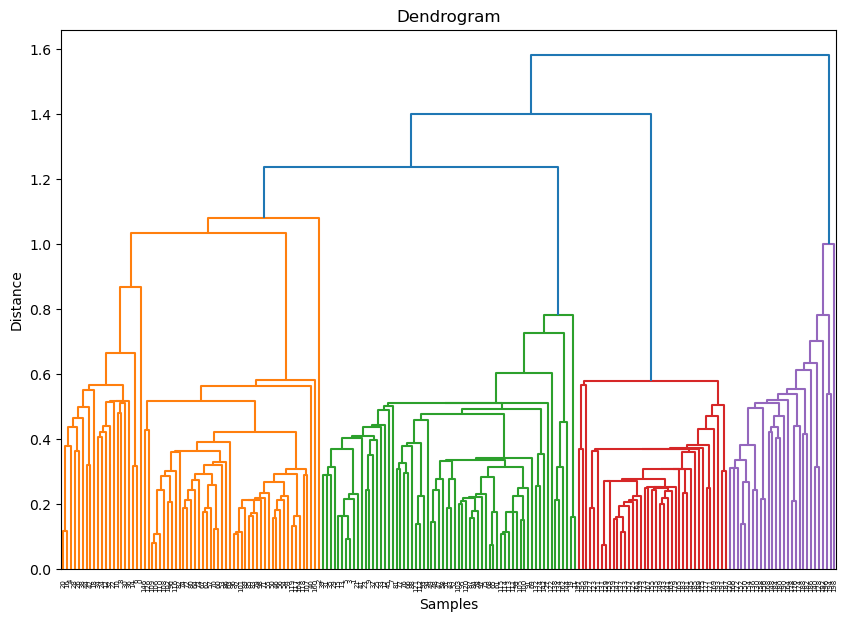

In [27]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

linked = linkage(df,method='single')

plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [33]:
# Train model
model = AgglomerativeClustering(n_clusters = 5)
model.fit(df)
df['labels'] = model.labels_
df

,Age,Annual Income,Spending Score,clusters,labels
0,-1.424569,-1.738999,-0.434801,1,1
1,-1.281035,-1.738999,1.195704,0,0
2,-1.352802,-1.700830,-1.715913,1,1
3,-1.137502,-1.700830,1.040418,0,0
4,-0.563369,-1.662660,-0.395980,1,1
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,3,3
196,0.441365,2.497807,-0.861839,4,4
197,-0.491602,2.497807,0.923953,3,3
198,-0.491602,2.917671,-1.250054,4,4


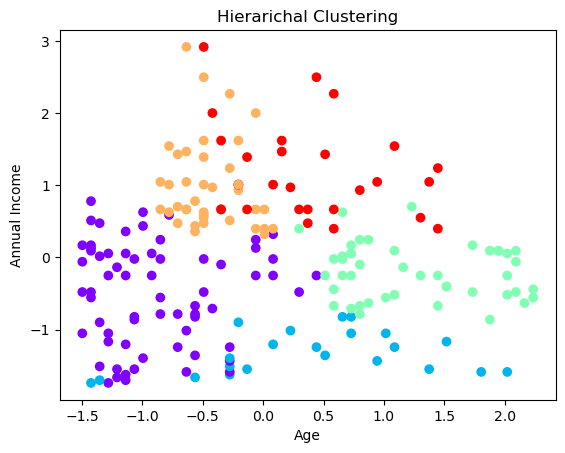

In [29]:
# visualization
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labels,cmap='rainbow')
plt.title("Hierarichal Clustering")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

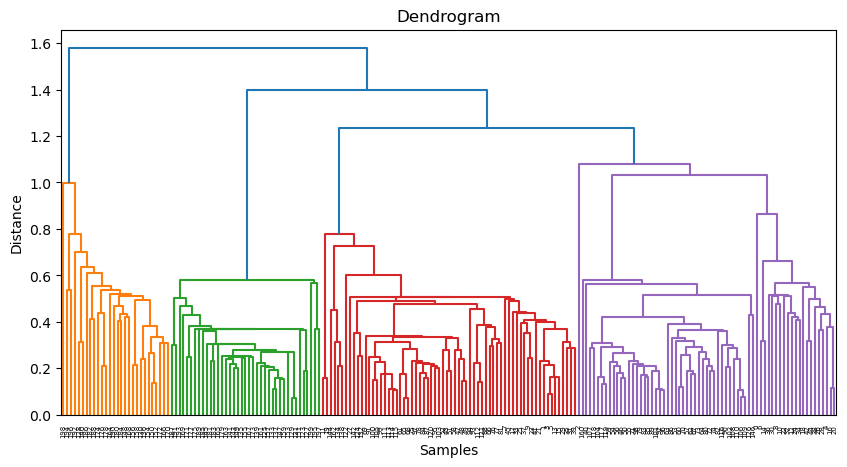

In [30]:
# Plot dendrogram with threshold

plt.figure(figsize=(10,5))
dendrogram(linked)
plt.axhline(y=150,color='r',linestyle='--')
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [31]:
# find the number of clusters using threshold
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linked,t=150,criterion='distance')
n_clusters = len(set(clusters))
print(f"Number of Clusters : ",n_clusters)

Number of Clusters :  1


In [32]:
 # Optimal threshold found from dendrogram (distance ~8 gives ~4.5 clusters)
threshold = 8
agglomerative_model = AgglomerativeClustering(n_clusters = 5,linkage = 'ward')
agglomerative_clusters = agglomerative_model.fit_predict(df)

#display cluster labels
df['clusters'] = agglomerative_model.labels_

In [46]:
import joblib
joblib.dump(model,'agglomerative_model.pkl')

['agglomerative_model.pkl']

In [42]:
df.to_csv("Hierarichal_Mall_Customers.csv",index=False)

In [54]:
# Features (ONLY these 3)
X = df[['Age', 'Annual Income', 'Spending Score']]

# Target (clusters from agglomerative clustering)
y = df['clusters']


In [55]:
# splitting parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [57]:
y_pred = dt_model.predict(X_test)


In [58]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.925


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         6
           3       1.00      1.00      1.00         5
           4       1.00      0.90      0.95        10

    accuracy                           0.93        40
   macro avg       0.94      0.96      0.94        40
weighted avg       0.94      0.93      0.93        40

Confusion Matrix:

[[14  0  2  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  5  0]
 [ 1  0  0  0  9]]


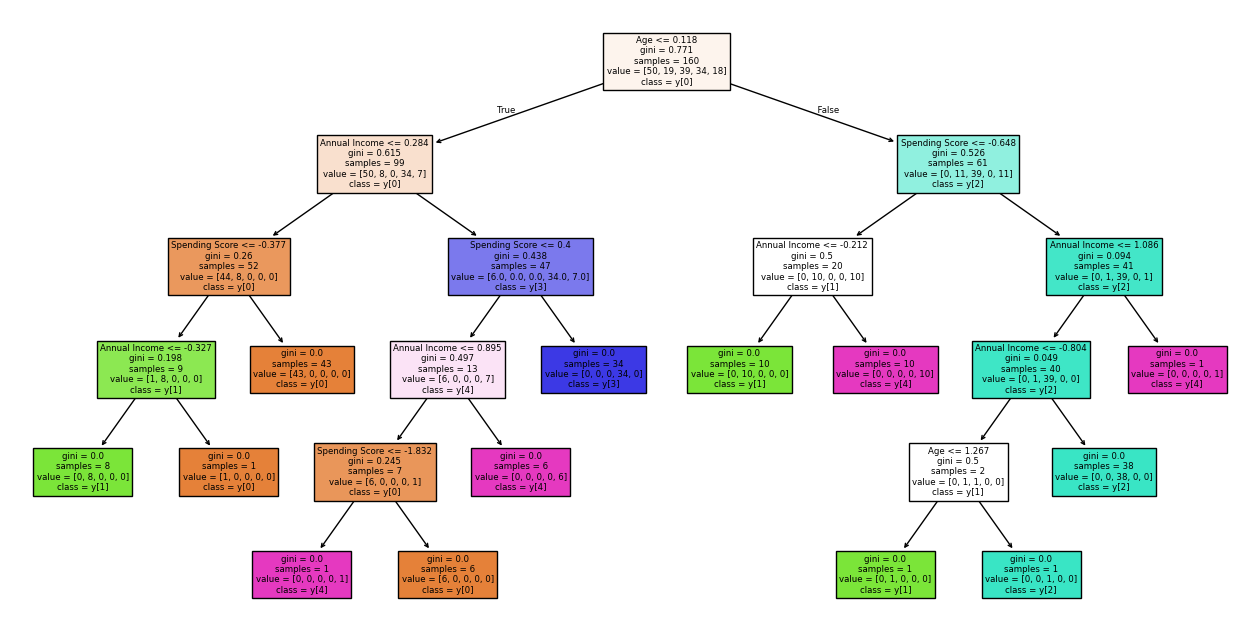

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.show()


In [62]:
import joblib

joblib.dump(dt_model, "decision_tree_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']